In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest, RFE, chi2
from sklearn.model_selection import train_test_split
from sklearn.tree import ExtraTreeClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import  make_pipeline

In [2]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/diabetes.csv'
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:ylabel='Outcome'>

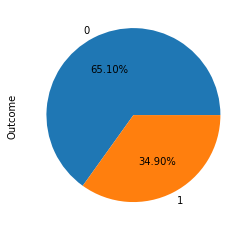

In [6]:
df.Outcome.value_counts().plot(kind='pie', autopct='%.2f%%')

In [8]:
X = df.drop(columns='Outcome')
y = df.Outcome

In [59]:
featSelector = SelectKBest(chi2, k=3)
featSelector.fit(X, y)
print('scores',featSelector.scores_)
print('columns',featSelector.get_feature_names_out())
X[featSelector.get_feature_names_out()]

scores [ 111.51969064 1411.88704064   17.60537322   53.10803984 2175.56527292
  127.66934333    5.39268155  181.30368904]
columns ['Glucose' 'Insulin' 'Age']


,Glucose,Insulin,Age
0,148,0,50
1,85,0,31
2,183,0,32
3,89,94,21
4,137,168,33
...,...,...,...
763,101,180,63
764,122,0,27
765,121,112,30
766,126,0,47


In [61]:
clf = SVC(kernel='linear',)
featEl = RFE(clf, n_features_to_select=2)
featEl.fit(X, y)
print('ranking', featEl.ranking_)
print('columns',featEl.get_feature_names_out())
X[featEl.get_feature_names_out()]

ranking [1 3 4 6 7 2 1 5]
columns ['Pregnancies' 'DiabetesPedigreeFunction']


,Pregnancies,DiabetesPedigreeFunction
0,6,0.627
1,1,0.351
2,8,0.672
3,1,0.167
4,0,2.288
...,...,...
763,10,0.171
764,2,0.340
765,5,0.245
766,1,0.349


In [70]:
print(ExtraTreeClassifier().fit(X,y).feature_importances_.tolist())
cols = [1,5,6,7]
X.iloc[:,cols]

[0.08638009426743623, 0.20014015670493884, 0.12647972304410698, 0.0898601724100718, 0.07593676300616743, 0.122526022304743, 0.11750109779930566, 0.18117597046323003]


,Glucose,BMI,DiabetesPedigreeFunction,Age
0,148,33.6,0.627,50
1,85,26.6,0.351,31
2,183,23.3,0.672,32
3,89,28.1,0.167,21
4,137,43.1,2.288,33
...,...,...,...,...
763,101,32.9,0.171,63
764,122,36.8,0.340,27
765,121,26.2,0.245,30
766,126,30.1,0.349,47


In [71]:
Xopt = X[featSelector.get_feature_names_out()]
Xtrain, Xtest, ytrain, ytest = train_test_split(X.iloc[:,cols].values, y.values, test_size=.2, random_state=2)
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(Xtrain, ytrain)
ypred= clf.predict(Xtest)
print('MATRIX\n', confusion_matrix(ytest, ypred))
print('REPORT\n', classification_report(ytest, ypred))

MATRIX
 [[97 12]
 [22 23]]
REPORT
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       109
           1       0.66      0.51      0.57        45

    accuracy                           0.78       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.77      0.78      0.77       154

